# 1. Diseño de amplificador de potencia 



Los amplificador sintonizados operan con señales periodicas con un ancho de banda asociado. Tipicamente, se utilizan para amplificar una señal portadora modulada. 

Para ilustrar el funcionamiento, supongamos que empleamos como exitación un tono de señal portadora, en este ejemplo sera de $f_o = 900 MHz$. 
El amplificador esta diseñado para operar en Clase AB, Clase B o Clase C, dependiendo del ángulo de circulación de la señal a la salida. 
Por ejemplo, suponiendo que el amplificador opera en Clase B, los pulsos de corriente de la fuente de salida corresponderan unicamente a parte positiva de la entrada (angulo de circulación de 180 grados).
Estos pulsos de corrientes tiene un espectro en frecuencia conformado principalmente por una señal fundamental de $900 MHz$ y sus armonicos. 
Si logramos atenuar los armonicos que conforman el pulso de corriente, obtenemos nuevamente la señal fundamental. Esto se logra empleando filtros LC.
La reduccuión del angulo de circulación mejora el rendimiento pero al mismo tiempo produce armonicos de mayor intensidad que deben ser atenuados para recomponener la señal portadora modulada. Esto exige filtros de salida mas selectivos. 


Dado que se busca una señal alterna a la salida del transistor, la tensión de DC del DRAIN permite la excursión de la señal alterna de $f_o = 900 MHz$, desde $V_{DD}$ (tensión de la fuente) hasta $V_{DSMIN}$. 
Esta excursión de la señal se logra conectando a la fuente de corriente $g_{ds}$ una resistencia de valor adecuado. 
Entonces, los pulsos de corriente producen sobre la resistencia una señal alterna de tensión a la frecuencia de sintonia. Cuando la fuente no entregue corriente (semiciclo negativo de la señal de entrada), es  el circuito resonador el que mantiene la osciladción a la frecuencia de resonancia. 

En este proyecto, la tensión de fuente en el DRAIN es de $V_{DD} = 13.8 V$.
La fuente de alimentación suministra los $13,8\,V$ que se conecta al Drain a través de una red del choque $B_2$, el inductor $L_1$ y el capacitor $C_2$ de $120 pF$ a tierra, y está desacoplado en una amplia gama de frecuencias por $C_3$, $C_4$ y $C_5$.

La polarización del Gate se logra a través del choque $B1$ desde la fuente de $13,8\,V$ y el divisor resistivo para establecer la corriente de Drain permanente en $50\,mA$.

La fuente de alimentación está desacoplado del Gate  por $C_1$. 

Con el Gate polarizado para $I_D = 50\,mA$ el amplificador consume muy poca potencia, por lo que cambiar la tensión del Gate con la señal a trasmitir es una forma conveniente de sacar el amplificador del modo de espera.
Tener en cuenta que el suministro de $13,8\,V$ del Drain debe emplear un regulador.

## 2. Diseño del circuito


![fig1](fig/PA_schematic.png)

El esquema del amplificador se muestra en la Fig. 


Se describe el diseño de un amplificador de potencia de $2\,W$ que cubre la banda de $900\,MHz$ y requiere alrededor de $100\,mW$ para una salida completa. 


El diseño es muy simple y se basa en un único dispositivo LDMOS de $13,8\,V$ de plástico SOT-89 $PD85004$ de ST.
El dispositivo está clasificado para dar una ganancia de 17 dB y $4\,W$ a $870\,MHz$.

La placa de circuito impreso está diseñada para no tener que necesitar disipador.


### 2.1 Adaptadores de Impedancia


La mayoría de los transistores de la banda de VHF tendrán la frecuencia resonante en serie dentro de su rango de operación, es decir, serán puramente resistivos en una sola frecuencia fs, mientras que la frecuencia resonante paralela fp estará fuera. 



La impedancia de salida de los transistores de potencia de RF, tal como se indica en las hojas de datos de todos los fabricantes, generalmente consiste sólo en un $C_{OUT}$ de capacitancia. 
Se supone que la resistencia interna del transistor es mucho mayor que la carga y normalmente se desprecia. 
En el caso de una resistencia interna relativamente baja, la eficiencia del dispositivo disminuiría por el factor

$$eff =1+ \frac{R_L}{R_T}$$

donde $R_L$ es la resistencia de carga, vista en los terminales del colector-emisor, y $R_T$ la resistencia del transistor interno igual a

$$\frac{1}{\omega_T (C_{CT}+C_{DC})}$$


definido como un  parámetro de pequeña señal.

La capacitancia de salida $C_{OUT}$, que es un parámetro de gran señal, está relacionada con el parámetro de señal pequeña $C_{CB}$, la capacitancia de transición de la base del colector.
Dado que la capacitancia de unión varía con el voltaje aplicado, $C_{OUT}$ difiere de $C_{CB}$ en que tiene que ser promediada sobre la oscilación total del voltaje.  
Para una unión abrupta y asumiendo ciertas simplificaciones, $C_{OUT} = 2 \cdot C_{CB}$. 

$C_{OUT}$ disminuye en parte debido a la presencia de la inductancia del colector, pero principalmente por el hecho de que el diodo emisor de base ya no se apaga cuando la frecuencia de funcionamiento se acerca a la frecuencia de tránsito $f_T$.

$C_{ISS}(V_{GS}= 0V, V_{DS}= 13.6V, f= 1\,MHz) = 16 pF$

$C_{OSS}(V_{GS}= 0V, V_{DS}= 13.6V, f= 1\,MHz) = 14 pF$

$C_{RSS}(V_{GS}= 0V, V_{DS}= 13.6V, f= 1\,MHz) = 1.1 pF$

#### 2.1.1 Carga de salida

A falta de una indicación más precisa, la carga de salida $R_L$ se toma igual a

$$R_L = \frac{(V_{CC}-V_{CE(SAT)})^2}{2 P_o}$$

con $V_{CE(sat)}$ igual a 2 o 3 voltios, aumentando con la frecuencia. 

La ecuación anterior sólo expresa una relación bien conocida, pero también muestra que la carga, en una primera aproximación, no está relacionada con el dispositivo, excepto para  $V_{CE(sat)}$.  
El valor de la carga viene dictado principalmente por la potencia de salida requerida y el pico de tensión; no se corresponde con la impedancia de salida del dispositivo. 
A frecuencias más altas esta aproximación se hace menos exacta y para los dispositivos de microondas la carga que debe presentarse al dispositivo se indica en la hoja de datos. 
En sentido estricto, la adaptación de la impedancia se realiza sólo en la entrada.  
La coincidencia entre etapas y la coincidencia de carga son más transformaciones de la impedancia de entrada del dispositivo y de la carga en un valor $R_L$ (a veces con un componente reactivo adicional) que depende esencialmente de la potencia demandada y del voltaje de la fuente de alimentación.


#### 2.1.2 Carga de entrada

La resistencia total con que se debe cargar a la fuente $g_{ds}$ entonces se calcula como:

$$R_L = \frac{(V_{CC}-V_{CE(SAT)})^2}{2 P_o}$$

Recordemos que estamos proyectando un amplificador de $P_o = 4 Watt$ (RMS). 

$$R_L  = 17.405 \Omega$$

Dado que el MOSFET presenta una capacidad, esta resistencia se emplea para frecuencias bajas (donde la capacidad de salida sea despreciable). 
Para frecuencias mayores, esta resistencia debe ser menor para compensar los efectos de la capacidad.


De la hoja de datos podemos obtener la impedancia de entrada y de salida del amplificador que debemos presentarle al MOSFET a la frecuencia de trabajo. Dada la alta frecuencia este valor difiere del calculado debido a las capacidades del dispositivo. 

A la frecuencia de trabajo $f_o = 900 MHz$

$$Z_{in} = (2,629 + j6,970) \Omega$$ 

$$Z_{L}  = (7,773 + j4,100) \Omega$$ 

El amplificador utiliza lineas microstrips de $50\,\Omega$ y capacitores para la adaptación, y no requiere ajuste. 
Dos grandes ventajas de usar solo líneas de $50\,\Omega$  durante el desarrollo es que se requiere una PCB con un solo ancho de línea coincidente y los capacitores se pueden mover arriba y abajo de la línea para ajustar. 
En segundo lugar, el PCB se convierte en una placa de uso general para adaptar la entrada/salida SOT-89 a $50\,\Omega$.

En este amplificador, las impedancias de entrada y salida del dispositivo se ajustan a $50\,\Omega$  mediante redes de pasa-bajo.


## 3. Verificación

1. La adaptación del adaptador de entrada para la frecuecia de $fo= 900\,MHz$$

2. La adaptación del adaptador de salida para la frecuecia de $fo= 900\,MHz$$

3. Empleando la curva de Potencia de entra de entra vs Potencia de salida, graficar la tensión entrada y la corriente de salida, teniendo en cuenta que esta operando en Clase B.





## 4. Construcción

El PA está fabricado con material PCB FR4 estándar de 0,8 mm de espesor. 

El PD85004 utilizado en el diseño tiene un encapsulado de plástico SOT-89, que ahora se está volviendo más popular y elimina la necesidad del peligroso óxido de berilio. 
Debajo de la pestaña del dispositivo debe haber seis orificios pasantes metalizados para conectar la pestaña tanto térmica como eléctricamente al plano de tierra debajo, que luego actúa como un disipador de calor para el dispositivo. 
Una alternativa a los orificios pasantes metalizados para un PCB casera es usar 5 remaches de cobre. 
Los otros orificios de conexión a tierra se pueden hacer con remaches o vías de alambre de cobre soldadas a mano.

### 4.1 Armado

Conecte la salida del driver amplificador de $900MHz$ de baja potencia a la entrada del amplificador de potencia después de asegurarse primero de que la potencia de entrada no supere los $100\,mW$ ($+20\,dBm$). 

Conecte la salida del amplificador a un medidor de potencia/carga fantasma capaz de disipar al menos $3\,W$.

Conecte el Drain a $13,8\,V$ a través de un amperímetro en el rango de amperios de $100\,mA$.

Conecte el suministro de polarización del Gate, comenzando con voltios mínimos en la compuerta y muy cuidadosamente aumente el voltaje del Gate hasta que el dispositivo comience a tomar corriente. 

Este inicio es muy brusco, así que tener mucho cuidado, ya que la corriente del Gate puede subir fácilmente a muchos amperios si no tiene cuidado. 

Establezca la corriente de drenaje en $50\,mA$. 

Apague y luego cambie el amperímetro al rango de $1\,A$. 

Vuelva a encender. Aplique la unidad y verifique que el la potencia de salida es del orden de 2 vatios dependiendo del nivel de la unidad. 




In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 10,
          'figure.figsize': (10, 10),
         'axes.labelsize': 10,
         'axes.titlesize': 10,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params) 

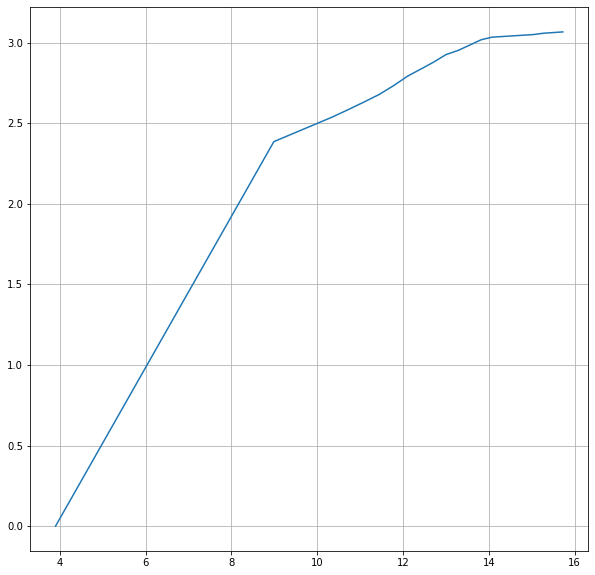

In [92]:
# En base al grafico de potencia:

Pin  =[0, 5, 8,  9,  10,  11,  12  ,13  ,14  ,15  ,16  ,17  ,18  ,19  ,20  ,21  ,22  ,23  ,24  ,25  ,26  ,27  ]

Pout =[0, 23, 26,  27,  28,  29,  30.2,31.5,32.5,33.5,34.6,35.2,36  ,36.8,37.2,37.3,37.4,37.5,37.6,37.8,37.9,38.0]


# Tensión Fuente
VDD  = 13.6 
Po   = 4
zgs  = 2.59+ 1j* 6.83 
zds  = 8.08+ 1j* 3.46
# Tension entrada 
VGG = 3.9

# Frecuencia de trabajo
fc = 900e6
fs = 20*fc
ds = 1/fs
# vector de tiempo 
numT  = 4
T     = numT/fc
time  = np.arange(0,T,ds)



vin =  [(P*50*2)**0.5 for P in Pin]

vgs =  [(P*zgs.real*2)**0.5+VGG for P in Pin]

ids =  [(Po*2/zds.real)**0.5 for Po in Pout]

plt.plot(vgs,ids)
plt.grid()

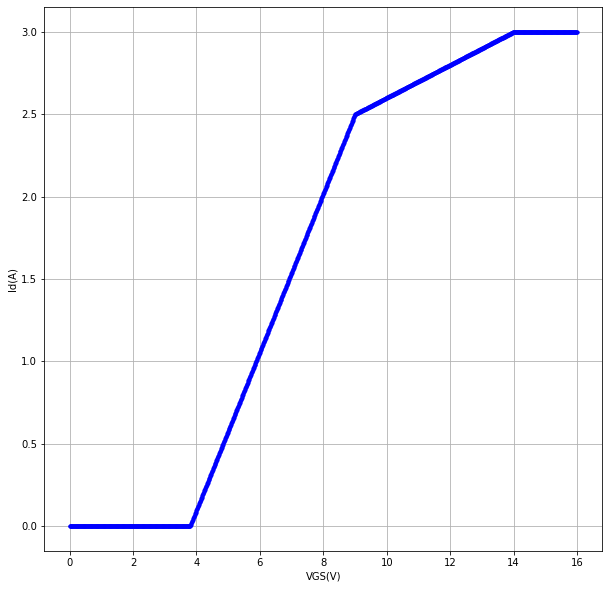

In [93]:
def idi(v):
    i =  0.                     if (v < 3.8) else 0
    i =       (2.5/5.2)*(v-3.8) if (v >= 3.8  and v <  9) else i
    i =  2.5 +(0.5/5.0)*(v-9.0) if (v >= 9    and v < 14) else i
    i = (3.0)                   if (v >= 14  ) else i
    return i



vgsa = np.arange(0,16,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

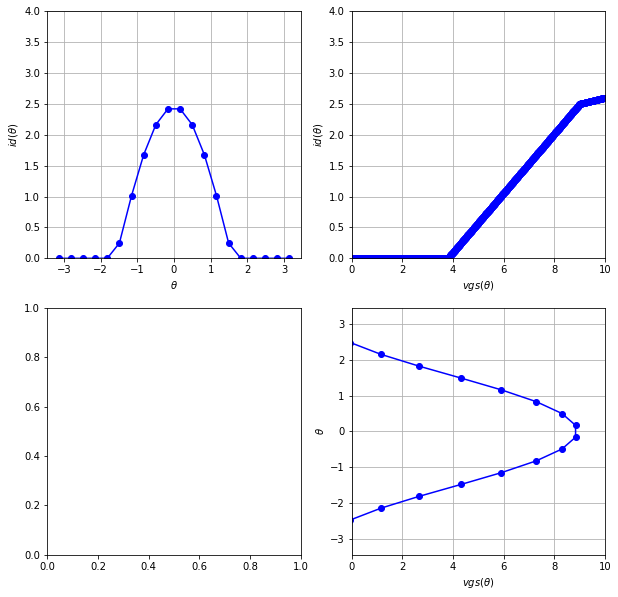

In [101]:
# defino el sampleo
nt  = int(T/ds/numT)
# vector de tiempo 
th  = np.pi*np.linspace(-1, 1, num=nt)

vgs  = 5

vgst = VGG + vgs * np.cos(th)

idst = np.array([idi(v) for v in vgst])


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, idst, 'bo-')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')
ax1.set(ylim=(0, 4))

ax2.plot(vgsa, idsa, 'bo-')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(0, 10))
ax2.set(ylim=(0, 4))

ax4.plot(vgst,th, 'bo-')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(0, 10))

plt.show()


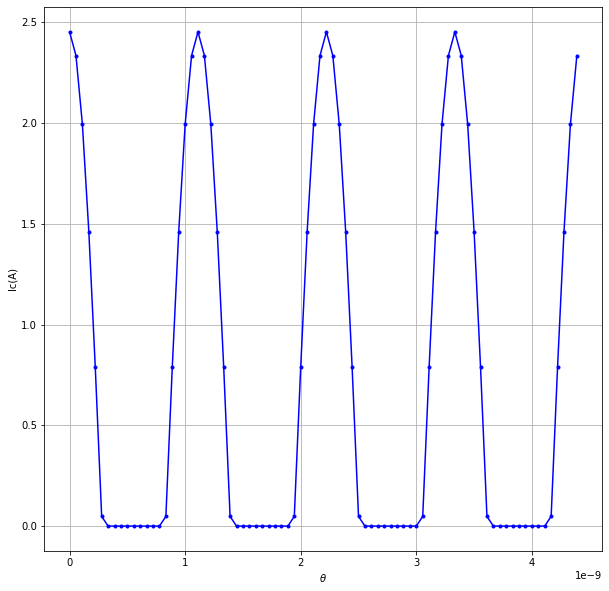

In [97]:
vgst = VGG + vgs * np.cos(2*np.pi*fc*time)

idst = np.array([idi(v) for v in vgst])

plt.plot(time, idst,'b.-')

#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


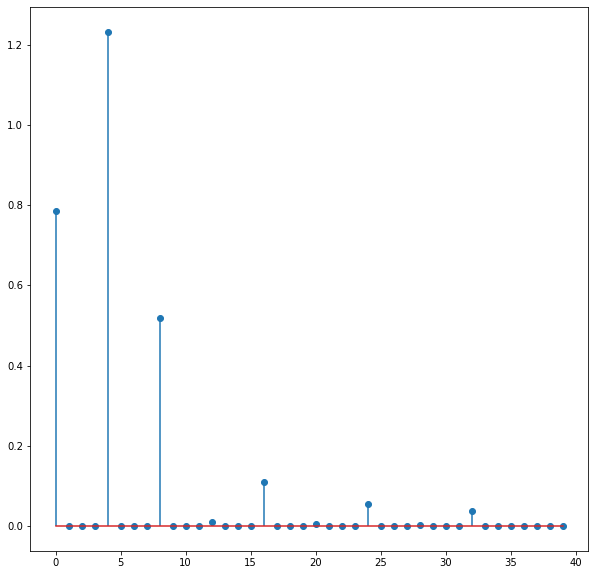

In [98]:
# Transformada Discreta de Fourier     
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 

Idsf = DFT(idst)

plt.stem(abs(Idsf[:]) )
plt.show()


1.2322776515128606 8.08 6.134773170088927 [         inf   2.04535192  -2.65468437  -3.83251473  -4.88611989
  -5.83922168  -6.70933545  -7.50976253  -8.25084225  -8.94077097
  -9.58615618 -10.1924024  -10.76398654 -11.30465875 -11.81759169
 -12.30549333 -12.77069349 -13.21521112 -13.64080726 -14.0490272
 -14.44123434 -14.81863762]


<ipython-input-99-5e6f60347722>:9: RuntimeWarning: divide by zero encountered in true_divide
  print(Id1m, Rd, Po, 10*np.log(Po/Pin))
/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


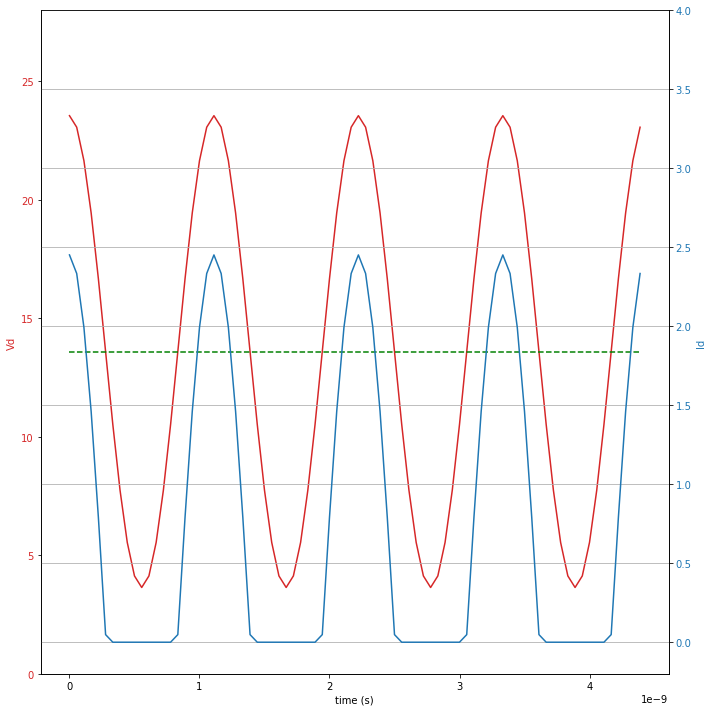

In [99]:
Id0 = Idsf[0]
Id1 = Idsf[1*numT].real * np.cos(2*np.pi*fc*time) + 1j * Idsf[1*numT].imag * np.sin(2*np.pi*fc*time)
Id2 = Idsf[2*numT]

Id1m = abs(Idsf[1*numT])
Po = Id1m**2*zds.real/2

Rd = zds.real
print(Id1m, Rd, Po, 10*np.log(Po/Pin))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Vd', color=color)
ax1.plot(time, VDD + Rd*Id1, color=color)
ax1.plot(time, [VDD for t in time] , 'g--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(ylim=(0, 28))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Id', color=color)  # we already handled the x-label with ax1
ax2.plot(time, idst, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set(ylim=(-0.2, 4))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()
